In [1]:
print("Iniciando el script de analisis candidatos neutrones...")
print("Importando librerias necesarias...")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from collections import defaultdict
import matplotlib.ticker as ticker
import sys
import pickle
sys.path.append("/scratch/cgarcia_2002/Complete_analysis")

import functions_spills
import functions_analysis

from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import importlib
importlib.reload(functions_analysis)
importlib.reload(functions_spills)

Iniciando el script de analisis candidatos neutrones...
Importando librerias necesarias...


<module 'functions_spills' from '/scratch/cgarcia_2002/Complete_analysis/functions_spills.py'>

In [2]:
with open('../Filtered_data/datos_filtrados.pkl', 'rb') as f:
    valores_read, indices_read = pickle.load(f)

with open('../Filtered_data/datos_filtrados_sig.pkl', 'rb') as f:
    valores_read_sig, indices_read_sig = pickle.load(f)

times_branch_filtered = functions_analysis.a_lista_de_arrays(valores_read, indices_read)
times_branch_filtered_sig = functions_analysis.a_lista_de_arrays(valores_read_sig, indices_read_sig)

print("Datos filtrados descargados")
N_events = len(times_branch_filtered)
N_events_sig = len(times_branch_filtered_sig)

print("Numero de eventos bkg", N_events)
print("Numero de eventos señal", N_events_sig)

Datos filtrados descargados
Numero de eventos bkg 157955
Numero de eventos señal 79586


62576 48717


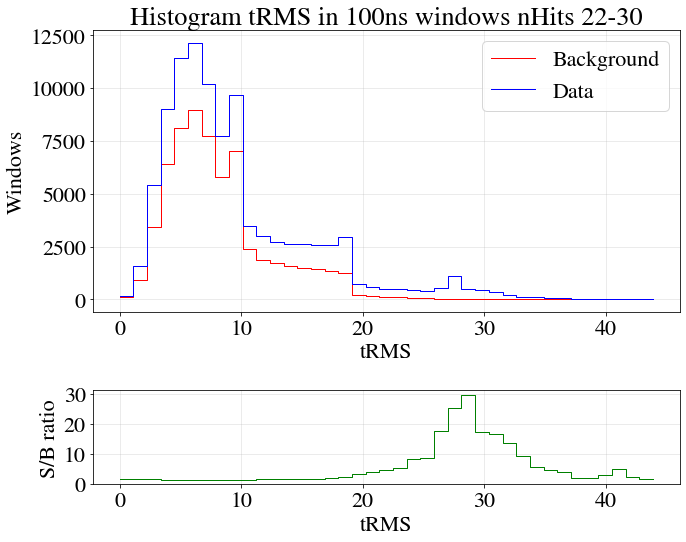

In [3]:
filename = f'../csv_saveData/tRMS/tRMS_100nsWdw_22-30.csv'
t_RMS = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_100nsWdw_sig_22-30.csv'
t_RMS_sig = np.loadtxt(filename, delimiter=',', dtype=int)

print(len(t_RMS), len(t_RMS_sig))
hist, bins_edges = np.histogram(t_RMS, bins=40)
hist_sig, _ = np.histogram(t_RMS_sig, bins = bins_edges)

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
axs[0].set_ylabel('Windows')
axs[0].set_xlabel('tRMS')
axs[0].set_title(f'Histogram tRMS in 100ns windows nHits 22-30')
axs[0].legend()
axs[0].grid(alpha=0.3) 

# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_sig * N_events / N_events_sig,
    hist,
    out=np.full_like(hist, 0, dtype=float),
    where=hist > 0)

axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel("tRMS")
axs[1].set_ylabel("S/B ratio")
axs[1].grid(alpha=0.3) 
axs[1].set_yticks(np.arange(0, 31, 10))
plt.tight_layout()
plt.show()


121465 144901


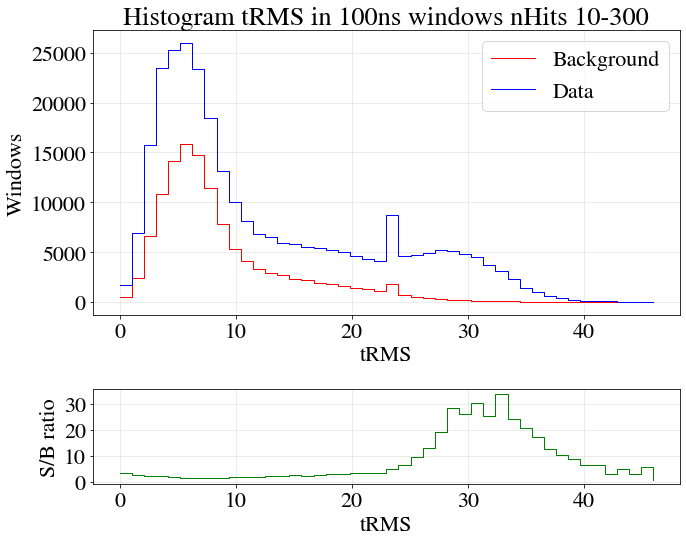

In [4]:
filename = f'../csv_saveData/tRMS/tRMS_100nsWdw_10-300.csv'
t_RMS = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_100nsWdw_sig_10-300.csv'
t_RMS_sig = np.loadtxt(filename, delimiter=',', dtype=int)

print(len(t_RMS), len(t_RMS_sig))

hist, bins_edges = np.histogram(t_RMS, bins=45)
hist_sig, _ = np.histogram(t_RMS_sig, bins = bins_edges)

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
axs[0].set_ylabel('Windows')
axs[0].set_xlabel('tRMS')
axs[0].set_title(f'Histogram tRMS in 100ns windows nHits 10-300')
axs[0].legend()
axs[0].grid(alpha=0.3) 

# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_sig* N_events / N_events_sig,
    hist,
    out=np.full_like(hist, 0, dtype=float),
    where=hist > 0)

axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel("tRMS")
axs[1].set_ylabel("S/B ratio")
axs[1].grid(alpha=0.3) 
axs[1].set_yticks(np.arange(0, 31, 10))
plt.tight_layout()
plt.show()

In [5]:
filename = f'../csv_saveData/tRMS/tRMS_100nsWdw_2.csv'
t_RMS = np.loadtxt(filename, delimiter=',', dtype=int)

In [6]:
filename = f'../csv_saveData/tRMS/tRMS_100nsWdw_sig_2.csv'
t_RMS_sig = np.loadtxt(filename, delimiter=',', dtype=int)


In [7]:
print(len(t_RMS)/N_events, len(t_RMS_sig)/N_events_sig)


124.33688075717768 232.05732163948434


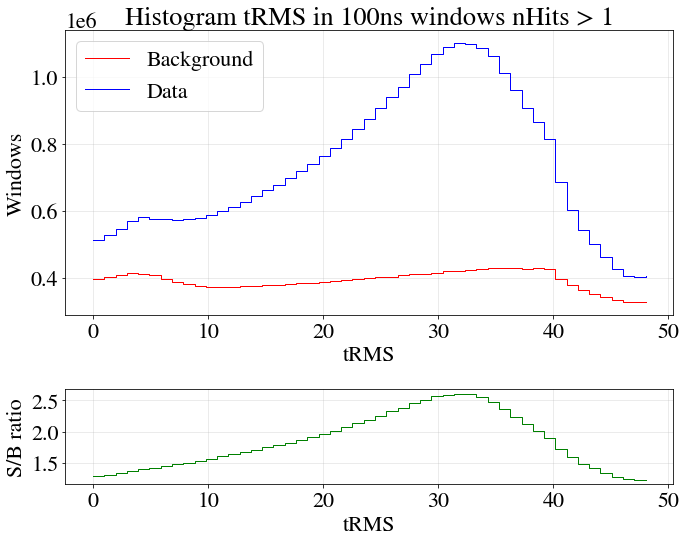

In [8]:
hist, bins_edges = np.histogram(t_RMS, bins=50)
hist_sig, _ = np.histogram(t_RMS_sig, bins = bins_edges)

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
axs[0].step(bins_edges[:-1], hist_sig* N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
axs[0].set_ylabel('Windows')
axs[0].set_xlabel('tRMS')
axs[0].set_title(f'Histogram tRMS in 100ns windows nHits > 1')
axs[0].legend()
axs[0].grid(alpha=0.3) 

# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_sig* N_events / N_events_sig,
    hist,
    out=np.full_like(hist, 0, dtype=float),
    where=hist > 0)

axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel("tRMS")
axs[1].set_ylabel("S/B ratio")
axs[1].grid(alpha=0.3) 
plt.tight_layout()
plt.show()

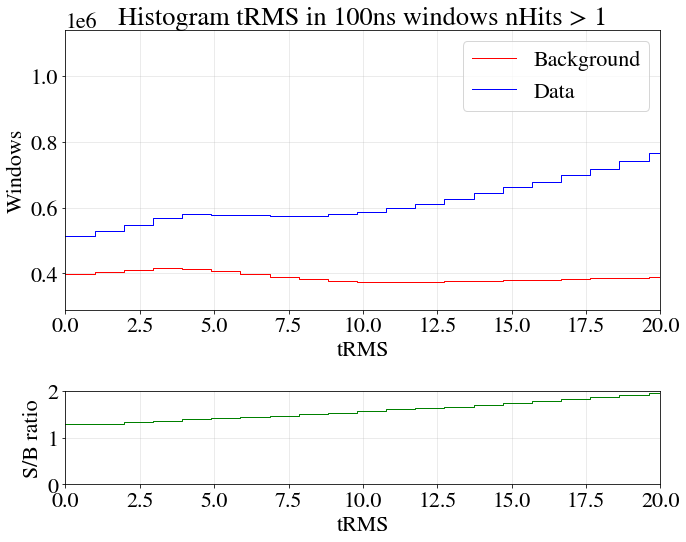

In [9]:
fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
axs[0].step(bins_edges[:-1], hist_sig* N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
axs[0].set_ylabel('Windows')
axs[0].set_xlabel('tRMS')
axs[0].set_title(f'Histogram tRMS in 100ns windows nHits > 1')
axs[0].legend()
axs[0].grid(alpha=0.3) 
axs[0].set_xlim(0, 20)
# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_sig* N_events / N_events_sig,
    hist,
    out=np.full_like(hist, 0, dtype=float),
    where=hist > 0)

axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel("tRMS")
axs[1].set_ylabel("S/B ratio")
axs[1].grid(alpha=0.3) 
axs[1].set_xlim(0, 20)
axs[1].set_ylim(0, 2)
plt.tight_layout()
plt.show()

In [10]:
filename = f'../csv_saveData/tRMS/tRMS_1000nsWdw_sup1.csv'
t_RMS_1000_sup1 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_1000nsWdw_sig_sup1.csv'
t_RMS_sig_1000_sup1 = np.loadtxt(filename, delimiter=',', dtype=int)

print(len(t_RMS), len(t_RMS_sig))

filename = f'../csv_saveData/tRMS/tRMS_1500nsWdw_sup1.csv'
t_RMS_1500_sup1 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_1500nsWdw_sig_sup1.csv'
t_RMS_sig_1500_sup1 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_2000nsWdw_sup1.csv'
t_RMS_2000_sup1 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_2000nsWdw_sig_sup1.csv'
t_RMS_sig_2000_sup1 = np.loadtxt(filename, delimiter=',', dtype=int)



19639632 18468514


In [12]:
filename = f'../csv_saveData/tRMS/tRMS_1000nsWdw_100-300.csv'
t_RMS_1000_sup100 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_1000nsWdw_sig_100-300.csv'
t_RMS_sig_1000_sup100 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_1500nsWdw_100-300.csv'
t_RMS_1500_sup100= np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_1500nsWdw_sig_100-300.csv'
t_RMS_sig_1500_sup100 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_2000nsWdw_100-300.csv'
t_RMS_2000_sup100 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_2000nsWdw_sig_100-300.csv'
t_RMS_sig_2000_sup100 = np.loadtxt(filename, delimiter=',', dtype=int)

In [14]:
filename = f'../csv_saveData/tRMS/tRMS_1000nsWdw_150-300.csv'
t_RMS_1000_sup150 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_1000nsWdw_sig_150-300.csv'
t_RMS_sig_1000_sup150 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_1500nsWdw_150-300.csv'
t_RMS_1500_sup150= np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_1500nsWdw_sig_150-300.csv'
t_RMS_sig_1500_sup150 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_2000nsWdw_150-300.csv'
t_RMS_2000_sup150 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_2000nsWdw_sig_150-300.csv'
t_RMS_sig_2000_sup150 = np.loadtxt(filename, delimiter=',', dtype=int)

In [16]:
filename = f'../csv_saveData/tRMS/tRMS_1000nsWdw_50-300.csv'
t_RMS_1000_sup50 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_1000nsWdw_sig_50-300.csv'
t_RMS_sig_1000_sup50 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_1500nsWdw_50-300.csv'
t_RMS_1500_sup50= np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_1500nsWdw_sig_50-300.csv'
t_RMS_sig_1500_sup50 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_2000nsWdw_50-300.csv'
t_RMS_2000_sup50 = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_2000nsWdw_sig_50-300.csv'
t_RMS_sig_2000_sup50 = np.loadtxt(filename, delimiter=',', dtype=int)

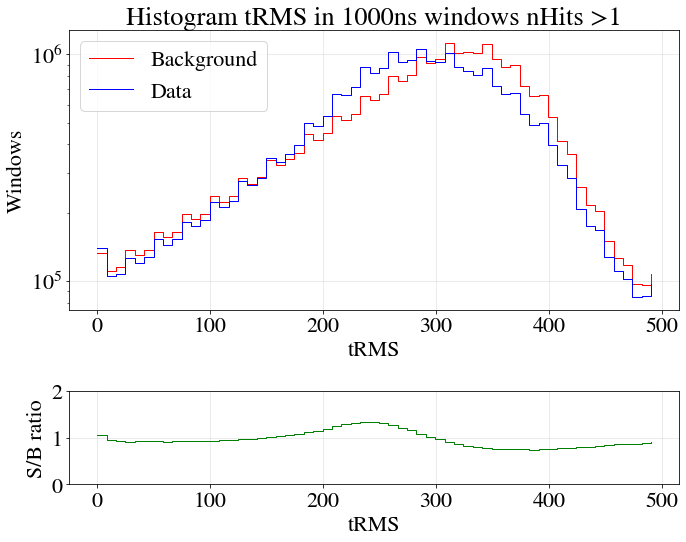

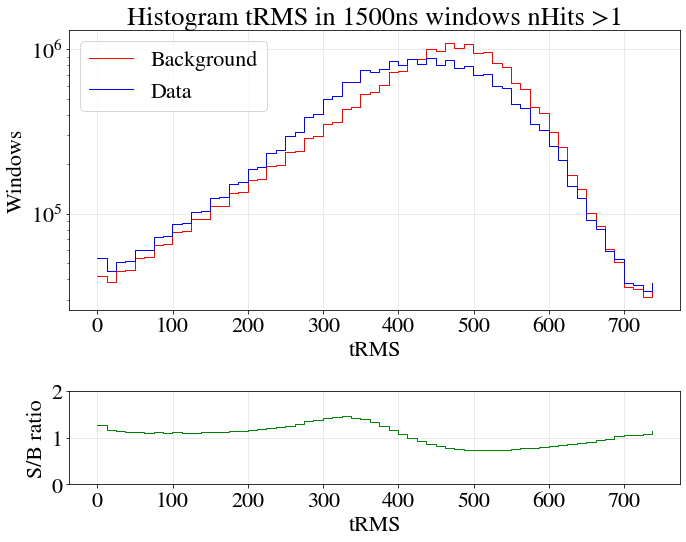

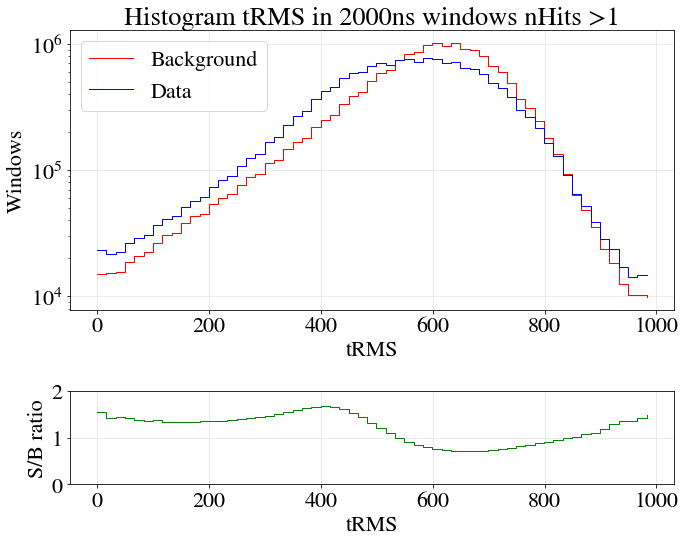

In [56]:
t_RMS_sup1 = [t_RMS_1000_sup1, t_RMS_1500_sup1, t_RMS_2000_sup1]
t_RMS_sup1_sig = [t_RMS_sig_1000_sup1, t_RMS_sig_1500_sup1, t_RMS_sig_2000_sup1]

list_windows = [1000, 1500, 2000]

for i, (data, data_sig) in enumerate(zip(t_RMS_sup1, t_RMS_sup1_sig)):

    hist, bins_edges = np.histogram(data, bins=60)
    hist_sig, _ = np.histogram(data_sig, bins=bins_edges)

    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

    # Top plot: Background and Signal
    axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
    axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
    axs[0].set_ylabel('Windows')
    axs[0].set_xlabel('tRMS')
    axs[0].set_title(f'Histogram tRMS in {list_windows[i]}ns windows nHits >1')
    axs[0].legend()
    axs[0].grid(alpha=0.3) 
    axs[0].set_yscale('log')

    # Bottom plot: Signal/Background Ratio
    ratio = np.divide(
        hist_sig* N_events / N_events_sig,
        hist,
        out=np.full_like(hist, 0, dtype=float),
        where=hist > 0)

    axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
    axs[1].set_xlabel("tRMS")
    axs[1].set_ylabel("S/B ratio")
    axs[1].grid(alpha=0.3) 
    axs[1].set_yticks(np.arange(0, 3, 1))
    plt.tight_layout()
    plt.show()

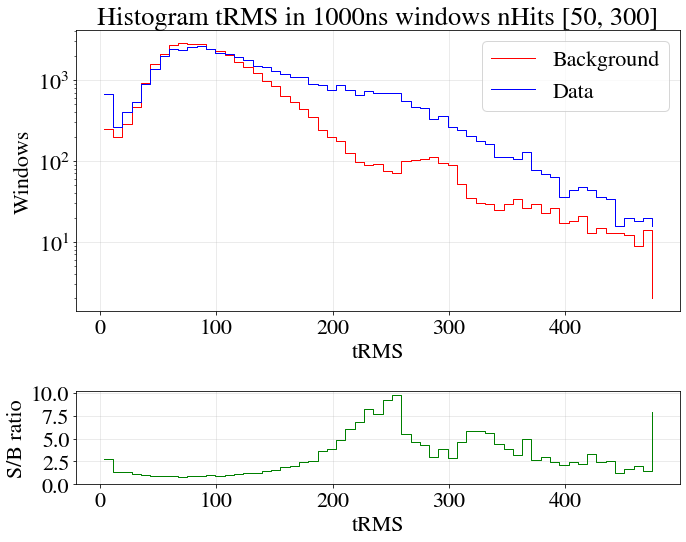

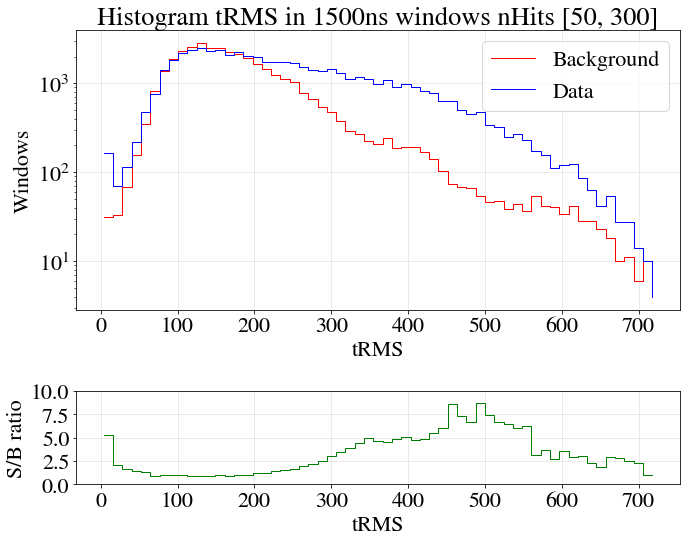

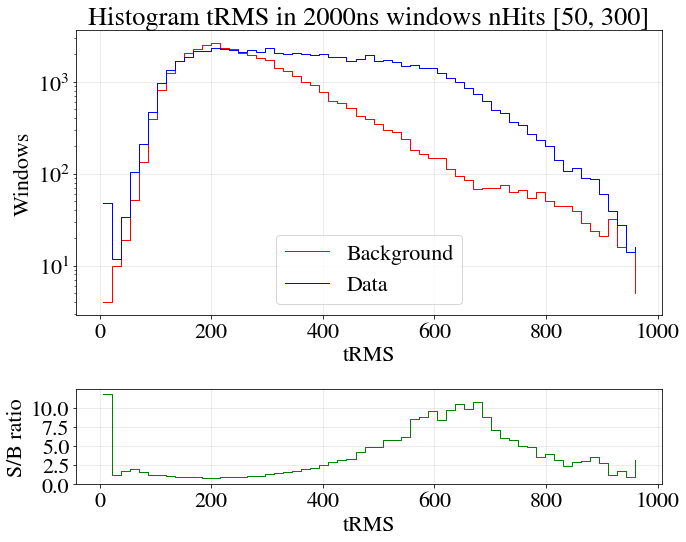

In [55]:
t_RMS_sup50 = [t_RMS_1000_sup50, t_RMS_1500_sup50, t_RMS_2000_sup50]
t_RMS_sup50_sig = [t_RMS_sig_1000_sup50, t_RMS_sig_1500_sup50, t_RMS_sig_2000_sup50]

for i, (data, data_sig) in enumerate(zip(t_RMS_sup50, t_RMS_sup50_sig)):

    hist, bins_edges = np.histogram(data, bins=60)
    hist_sig, _ = np.histogram(data_sig, bins=bins_edges)

    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

    # Top plot: Background and Signal
    axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
    axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
    axs[0].set_ylabel('Windows')
    axs[0].set_xlabel('tRMS')
    axs[0].set_title(f'Histogram tRMS in {list_windows[i]}ns windows nHits [50, 300]')
    axs[0].grid(alpha=0.3) 
    axs[0].legend()
    axs[0].set_yscale('log')
    # Bottom plot: Signal/Background Ratio
    ratio = np.divide(
        hist_sig* N_events / N_events_sig,
        hist,
        out=np.full_like(hist, 0, dtype=float),
        where=hist > 0)

    axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
    axs[1].set_xlabel("tRMS")
    axs[1].set_ylabel("S/B ratio")
    axs[1].grid(alpha=0.3) 
    axs[1].set_yticks(np.arange(0, 11, 2.5))
    plt.tight_layout()
    plt.show()

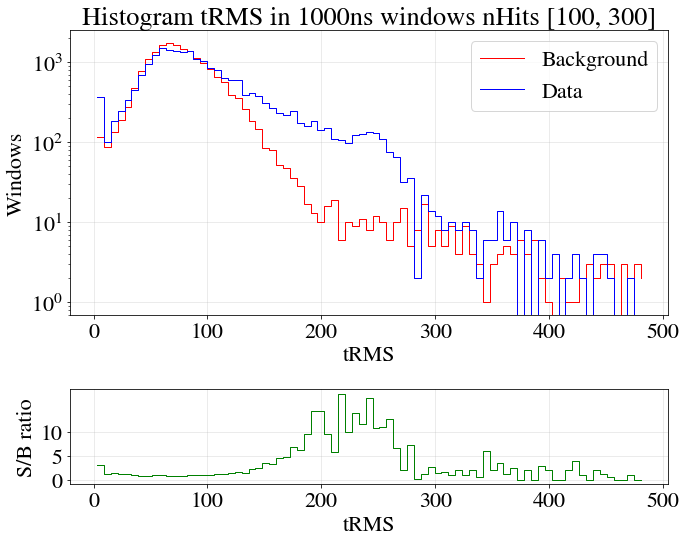

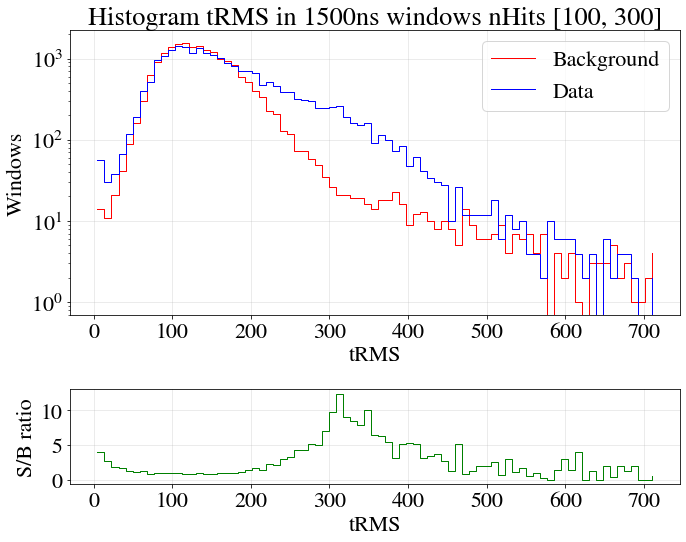

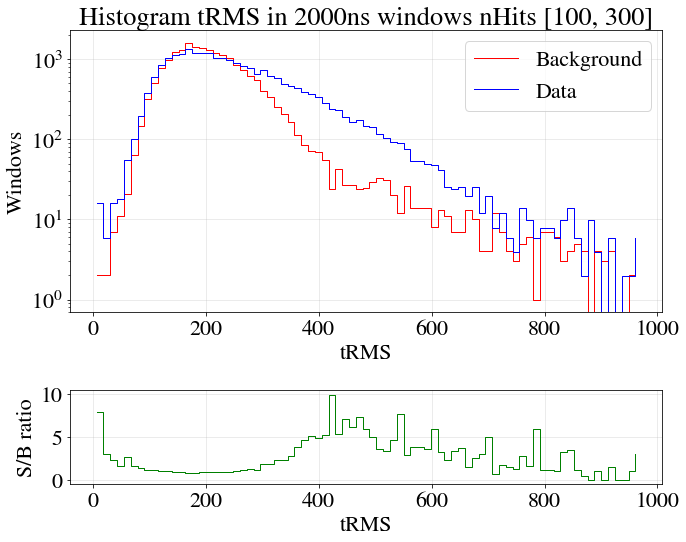

In [59]:
t_RMS_sup100 = [t_RMS_1000_sup100, t_RMS_1500_sup100, t_RMS_2000_sup100]
t_RMS_sup100_sig = [t_RMS_sig_1000_sup100, t_RMS_sig_1500_sup100, t_RMS_sig_2000_sup100]

for i, (data, data_sig) in enumerate(zip(t_RMS_sup100, t_RMS_sup100_sig)):

    hist, bins_edges = np.histogram(data, bins=80)
    hist_sig, _ = np.histogram(data_sig, bins=bins_edges)
    
    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

    # Top plot: Background and Signal
    axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
    axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
    axs[0].set_ylabel('Windows')
    axs[0].set_xlabel('tRMS')
    axs[0].set_title(f'Histogram tRMS in {list_windows[i]}ns windows nHits [100, 300]')
    axs[0].grid(alpha=0.3) 
    axs[0].legend()
    axs[0].set_yscale('log')
    #axs[0].set_xlim(50, 350)

    # Bottom plot: Signal/Background Ratio
    ratio = np.divide(
        hist_sig* N_events / N_events_sig,
        hist,
        out=np.full_like(hist, 0, dtype=float),
        where=hist > 0)

    axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
    axs[1].set_xlabel("tRMS")
    axs[1].set_ylabel("S/B ratio")
    axs[1].grid(alpha=0.3) 
    axs[1].set_yticks(np.arange(0, 11, 5))
    #axs[1].set_xlim(50, 350)
    plt.tight_layout()
    plt.show()

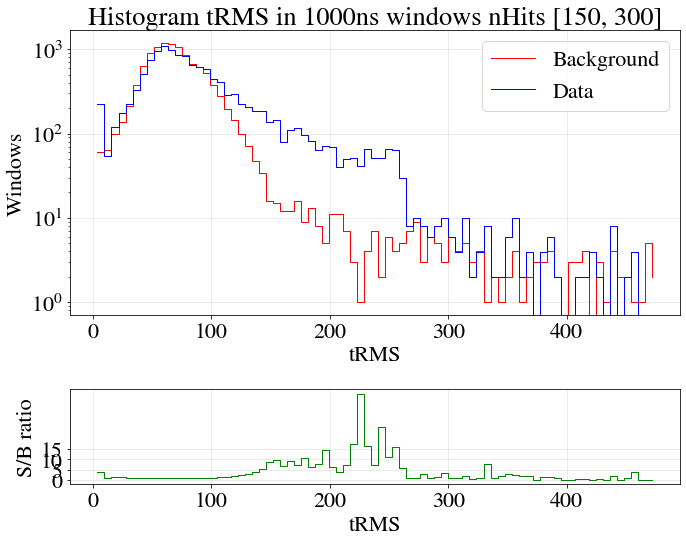

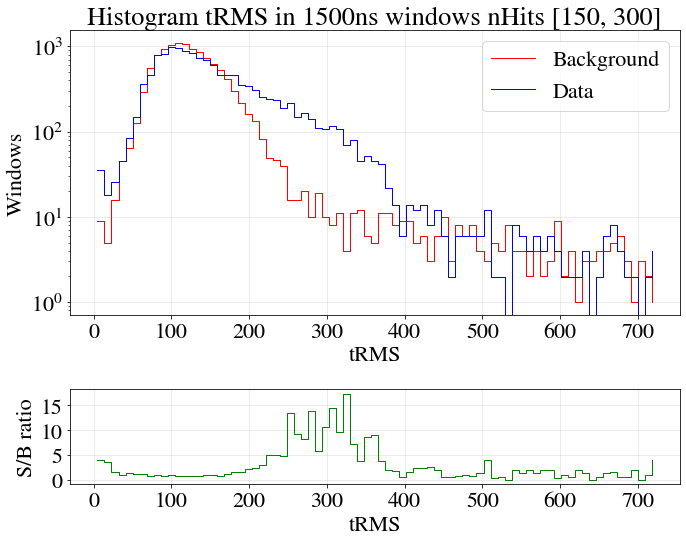

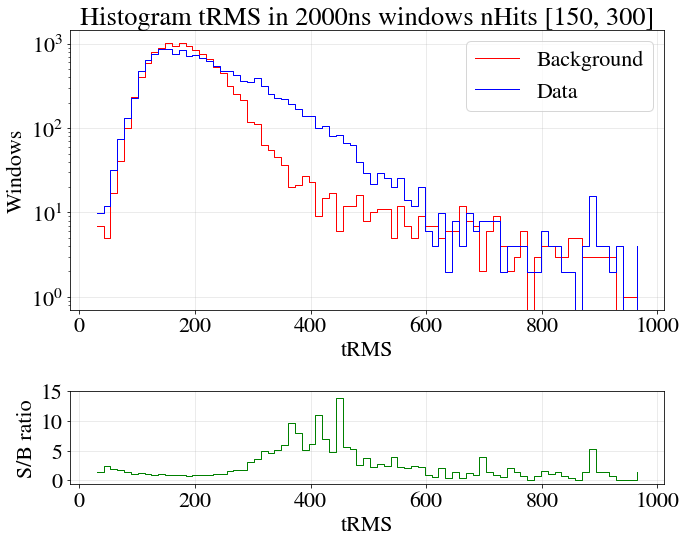

In [60]:
t_RMS_sup150 = [t_RMS_1000_sup150, t_RMS_1500_sup150, t_RMS_2000_sup150]
t_RMS_sup150_sig = [t_RMS_sig_1000_sup150, t_RMS_sig_1500_sup150, t_RMS_sig_2000_sup150]

for i, (data, data_sig) in enumerate(zip(t_RMS_sup150, t_RMS_sup150_sig)):

    hist, bins_edges = np.histogram(data, bins=80)
    hist_sig, _ = np.histogram(data_sig, bins=bins_edges)
    
    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

    # Top plot: Background and Signal
    axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
    axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
    axs[0].set_ylabel('Windows')
    axs[0].set_xlabel('tRMS')
    axs[0].set_title(f'Histogram tRMS in {list_windows[i]}ns windows nHits [150, 300]')
    axs[0].grid(alpha=0.3) 
    axs[0].legend()
    axs[0].set_yscale('log')
    #axs[0].set_xlim(50, 350)

    # Bottom plot: Signal/Background Ratio
    ratio = np.divide(
        hist_sig* N_events / N_events_sig,
        hist,
        out=np.full_like(hist, 0, dtype=float),
        where=hist > 0)

    axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
    axs[1].set_xlabel("tRMS")
    axs[1].set_ylabel("S/B ratio")
    axs[1].grid(alpha=0.3) 
    axs[1].set_yticks(np.arange(0, 16, 5))
    #axs[1].set_xlim(50, 350)
    plt.tight_layout()
    plt.show()

In [ ]:
filename = f'../csv_saveData/tRMS/tRMS_2000nsWdw.csv'
t_RMS = np.loadtxt(filename, delimiter=',', dtype=int)

filename = f'../csv_saveData/tRMS/tRMS_2000nsWdw_sig.csv'
t_RMS_sig = np.loadtxt(filename, delimiter=',', dtype=int)

print(len(t_RMS), len(t_RMS_sig))


In [ ]:

hist, bins_edges = np.histogram(t_RMS, bins=45)
hist_sig, _ = np.histogram(t_RMS_sig, bins = bins_edges)

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bins_edges[:-1], hist, where='post', linewidth=1, color='red', label='Background')
axs[0].step(bins_edges[:-1], hist_sig * N_events / N_events_sig, where='post', linewidth=1, color='blue', label = 'Data')
axs[0].set_ylabel('Windows')
axs[0].set_xlabel('tRMS')
axs[0].set_title(f'Histogram tRMS in 2000ns windows nHits >1')
axs[0].legend()
axs[0].grid(alpha=0.3) 

# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_sig* N_events / N_events_sig,
    hist,
    out=np.full_like(hist, 0, dtype=float),
    where=hist > 0)

axs[1].step(bins_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel("tRMS")
axs[1].set_ylabel("S/B ratio")
axs[1].grid(alpha=0.3) 
axs[1].set_yticks(np.arange(0, 3, 1))
plt.tight_layout()
plt.show()